# Content and Objectives

- Illustrate maximum-likelihood estimation in non-awgn channels
- Here: binary transmission and Poisson-distributed received signal

# Import

In [1]:
# importing
import numpy as np
from scipy import signal, special

import matplotlib.pyplot as plt
import matplotlib


In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(18, 8) )


# showing figures inline
%matplotlib inline

In [3]:
# set parameters for received values
lambda_0 = 5
lambda_1 = 20

# binary input (non BPSK-ed)
constellation = [ 0, 1 ]

# number of symbols within the signal
n_symb = 1000

# Illustrate PMF of received values

In [4]:
# integer y
y = np.arange( 0., 3. * lambda_1 )

y_pmf_0 = lambda_0 ** y / special.factorial( y ) * np.exp( - lambda_0 )
y_pmf_1 = lambda_1 ** y / special.factorial( y ) * np.exp( - lambda_1 )

max_0_value = np.max( y_pmf_0 )

<Figure size 1800x800 with 0 Axes>

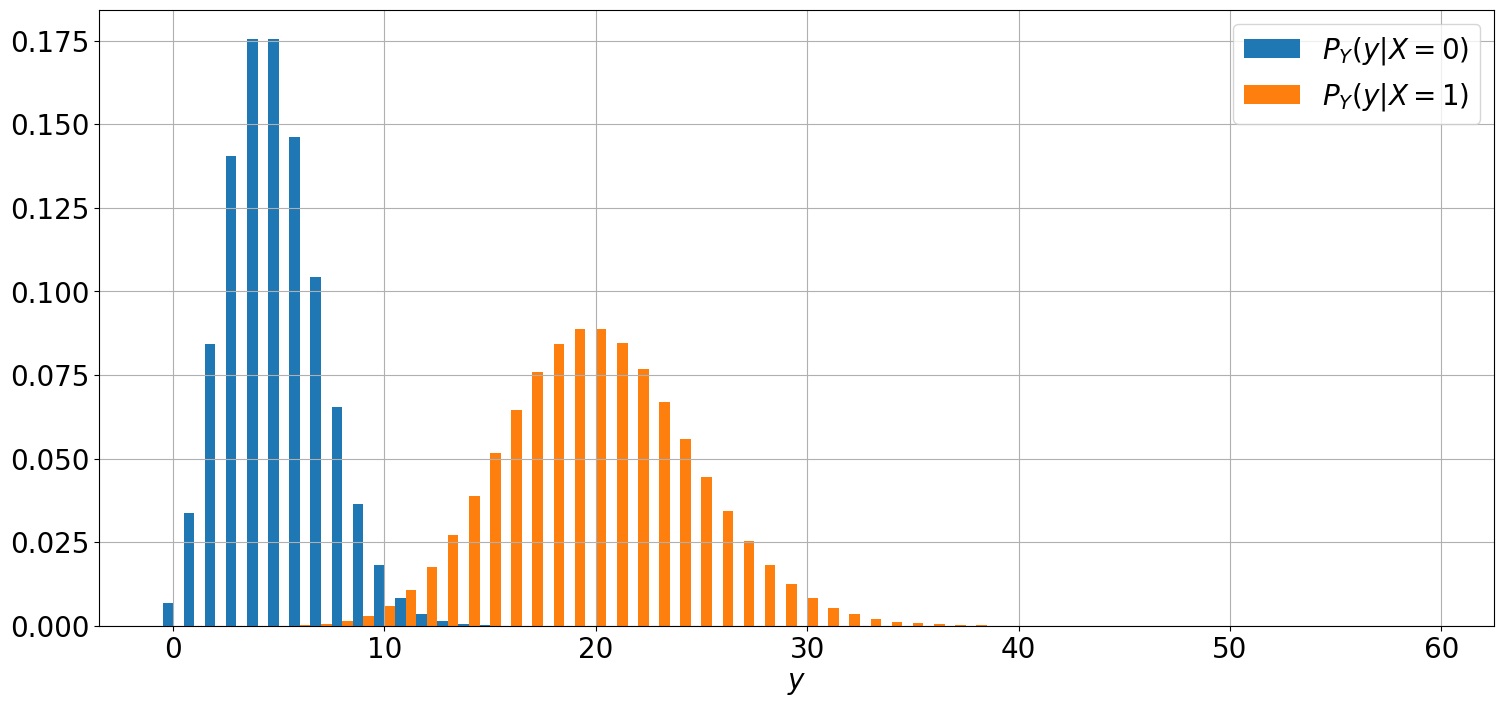

In [5]:
# Note: To show both PMFs in one plot, they are slightly shifted. 
# thus, the left hand value is the "0" pmf, the right hand value the "1" pmf

plt.figure()
fig, axs = plt.subplots(1, 1)
ax = plt.subplot(111)

width=.5

plt.bar( y-width/2, y_pmf_0, width=width, label='$P_Y(y|X=0)$' );
plt.bar( y+width/2, y_pmf_1, width=width, label='$P_Y(y|X=1)$' );

plt.xlabel('$y$'); 
plt.grid(1)
# plt.ylim( (0, max_0_value * 1.2 ) )
ax.xaxis.get_major_locator().set_params(integer=True)
plt.legend()
plt.show();



In [6]:
# find ML rule by comparing PMFs and compare to theoretical results
threshold = np.min( np.where( y_pmf_0 < y_pmf_1 ) )
theoretical_value = ( lambda_0 - lambda_1 ) / np.log( lambda_0 / lambda_1 )

print('empirical ML threshold: \t', threshold )
print('theoretical ML threshold: \t', theoretical_value )

empirical ML threshold: 	 11
theoretical ML threshold: 	 10.820212806667225
